# LSTM  806.04188 #wrong

# LSTM 544.23294

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('Train_Kaggle.csv')
df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [3]:
#temp=df['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
#df['Month']=temp
#df['Year-Month'] = df['Year'].astype(str)+ ' - ' + df['Month']
#df.head()

In [4]:
#train_d.drop(['Year','Month'], axis = 1, inplace = True)
#train_d=train_d[['Year- Month','ProductCategory','Sales(In ThousandDollars)']]
#train_d

In [5]:
for each in df[df['Sales(In ThousandDollars)'].isnull()].index.values.tolist():
    df.loc[each,'Sales(In ThousandDollars)']=0.5*(df.loc[each-3,'Sales(In ThousandDollars)']+df.loc[each+3,'Sales(In ThousandDollars)'])
df.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [6]:
df_1=df[df['ProductCategory']=='WomenClothing'].reset_index()
df_2=df[df['ProductCategory']=='MenClothing'].reset_index()
df_3=df[df['ProductCategory']=='OtherClothing'].reset_index()

In [7]:
macro_d=pd.ExcelFile('MacroEconomicData.xlsx')
macro_df = macro_d.parse("Sheet1")

#macro_df=macro_df
macro_df_1=pd.concat([macro_df,df_1[['Year','Month','Sales(In ThousandDollars)']]],axis=1)
macro_df_2=pd.concat([macro_df,df_2[['Year','Month','Sales(In ThousandDollars)']]],axis=1)
macro_df_3=pd.concat([macro_df,df_3[['Year','Month','Sales(In ThousandDollars)']]],axis=1)

In [8]:
macro_rest=macro_df_2[72:]

In [9]:
macro_df_1=macro_df_1.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
macro_df_2=macro_df_2.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
macro_df_3=macro_df_3.drop(['Monthly Nominal GDP Index (inMillion$)','Year-Month','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)[:72]
macro_rest=macro_rest.drop(['Monthly Nominal GDP Index (inMillion$)','PartyInPower','AdvertisingExpenses (in Thousand Dollars)'],axis=1)

In [10]:
#macro_df['PartyInPower'].unique()
list(macro_df_1)

['Monthly Real GDP Index (inMillion$)',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Cotton Monthly Price - US cents per Pound(lbs)',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Production (in  480-lb netweright in million bales)',
 'Mill use  (in  480-lb netweright in million bales)',
 'Exports',
 'Year',
 'Month',
 'Sales(In ThousandDollars)']

In [11]:
#macro_df[macro_df['CPI'].isnan()]
macro_rest

,Year-Month,Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month,Sales(In ThousandDollars)
72,2015 - Jan,16319.786314,258.376,5.7,11.99,10.47,24.88,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.450,NaN,NaN,NaN
73,2015 - Feb,16400.926737,259.240,5.5,11.98,9.85,25.05,69.84,3.70,10.845,9.518,781,15.496,3.625,10.200,NaN,NaN,NaN
74,2015 - Mar,16329.523792,259.647,5.4,11.98,9.85,25.04,69.35,-0.70,10.845,9.518,781,15.496,3.625,10.250,NaN,NaN,NaN
75,2015 - Apr,16427.136671,259.959,5.4,11.98,9.85,24.94,71.70,3.39,10.845,9.518,794,15.735,3.625,10.250,NaN,NaN,NaN
76,2015 - May,16434.482376,261.066,5.5,12.04,9.69,24.88,72.86,1.62,10.845,9.157,826,15.753,3.625,10.300,NaN,NaN,NaN
77,2015 - Jun,16521.301886,261.512,5.3,12.04,9.69,24.77,72.35,-0.70,9.399,8.451,797,14.030,3.775,10.150,NaN,NaN,NaN
78,2015 - Jul,16475.999854,261.199,5.2,12.04,9.69,24.83,72.35,0.00,8.850,8.353,807,14.035,3.725,10.250,NaN,NaN,NaN
79,2015 - Aug,16505.537615,261.347,5.1,12.10,9.80,25.04,71.82,-0.73,8.750,7.749,784,12.650,3.675,9.475,NaN,NaN,NaN
80,2015 - Sep,16601.489879,261.887,5.0,12.10,9.80,25.05,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700,NaN,NaN,NaN
81,2015 - Oct,16540.859723,261.515,5.0,12.10,9.80,25.14,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700,NaN,NaN,NaN


In [12]:
# Remove non important features.
macro_df_1=macro_df_1.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)
macro_df_2=macro_df_2.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)
macro_df_3=macro_df_3.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)
macro_rest=macro_rest.drop(['Cotton Monthly Price - US cents per Pound(lbs)','Production (in  480-lb netweright in million bales)','Mill use  (in  480-lb netweright in million bales)'],axis=1)



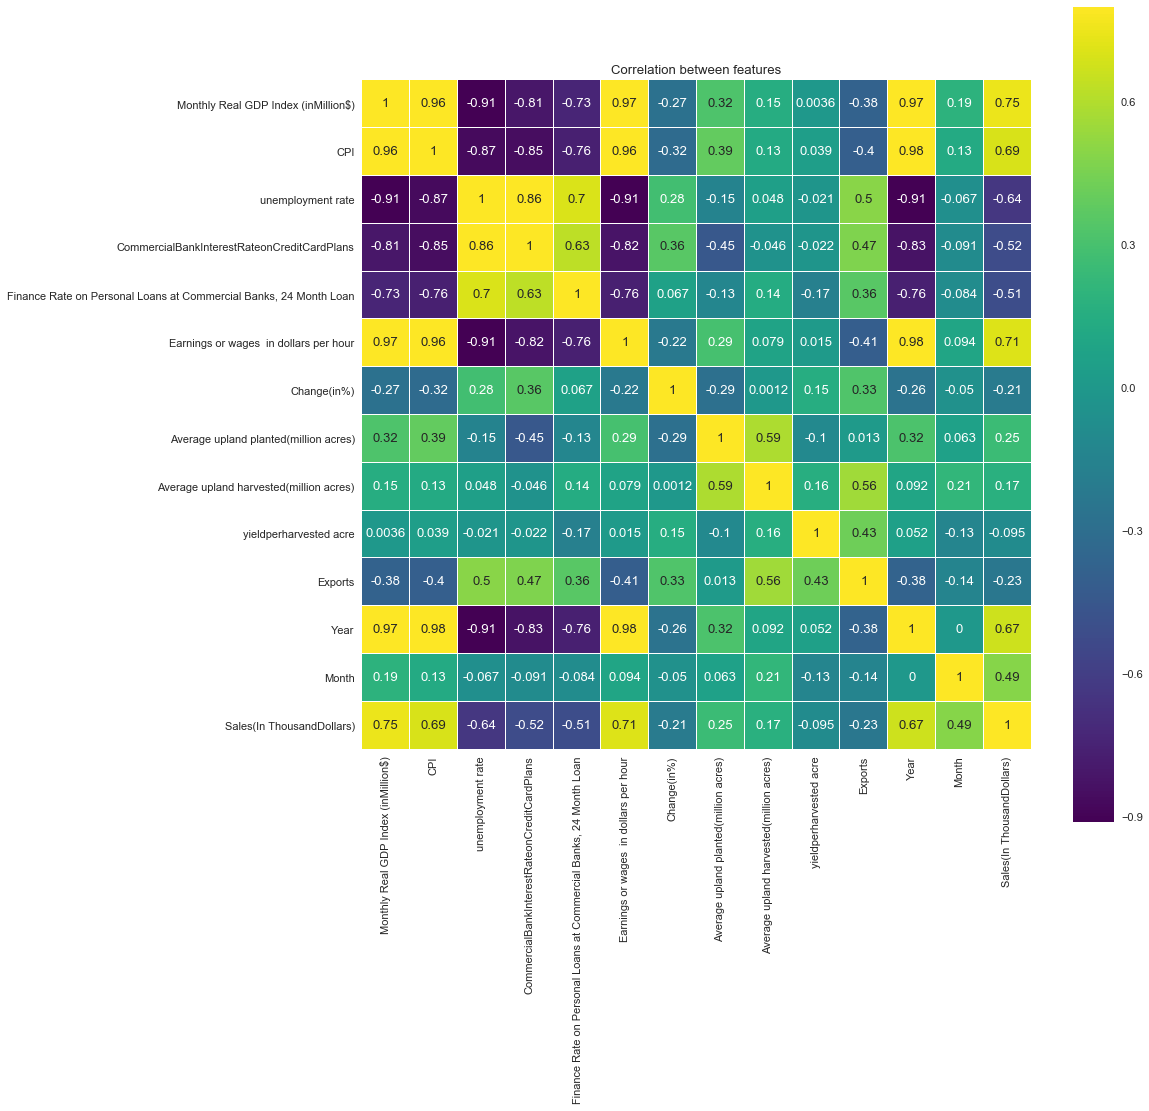

In [13]:
# Heat Map macro df_1
corrMatrix=macro_df_1[list(macro_df_1)].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [14]:
list(macro_df_1)

['Monthly Real GDP Index (inMillion$)',
 'CPI',
 'unemployment rate',
 'CommercialBankInterestRateonCreditCardPlans',
 'Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan',
 'Earnings or wages  in dollars per hour',
 'Change(in%)',
 'Average upland planted(million acres)',
 'Average upland harvested(million acres)',
 'yieldperharvested acre',
 'Exports',
 'Year',
 'Month',
 'Sales(In ThousandDollars)']

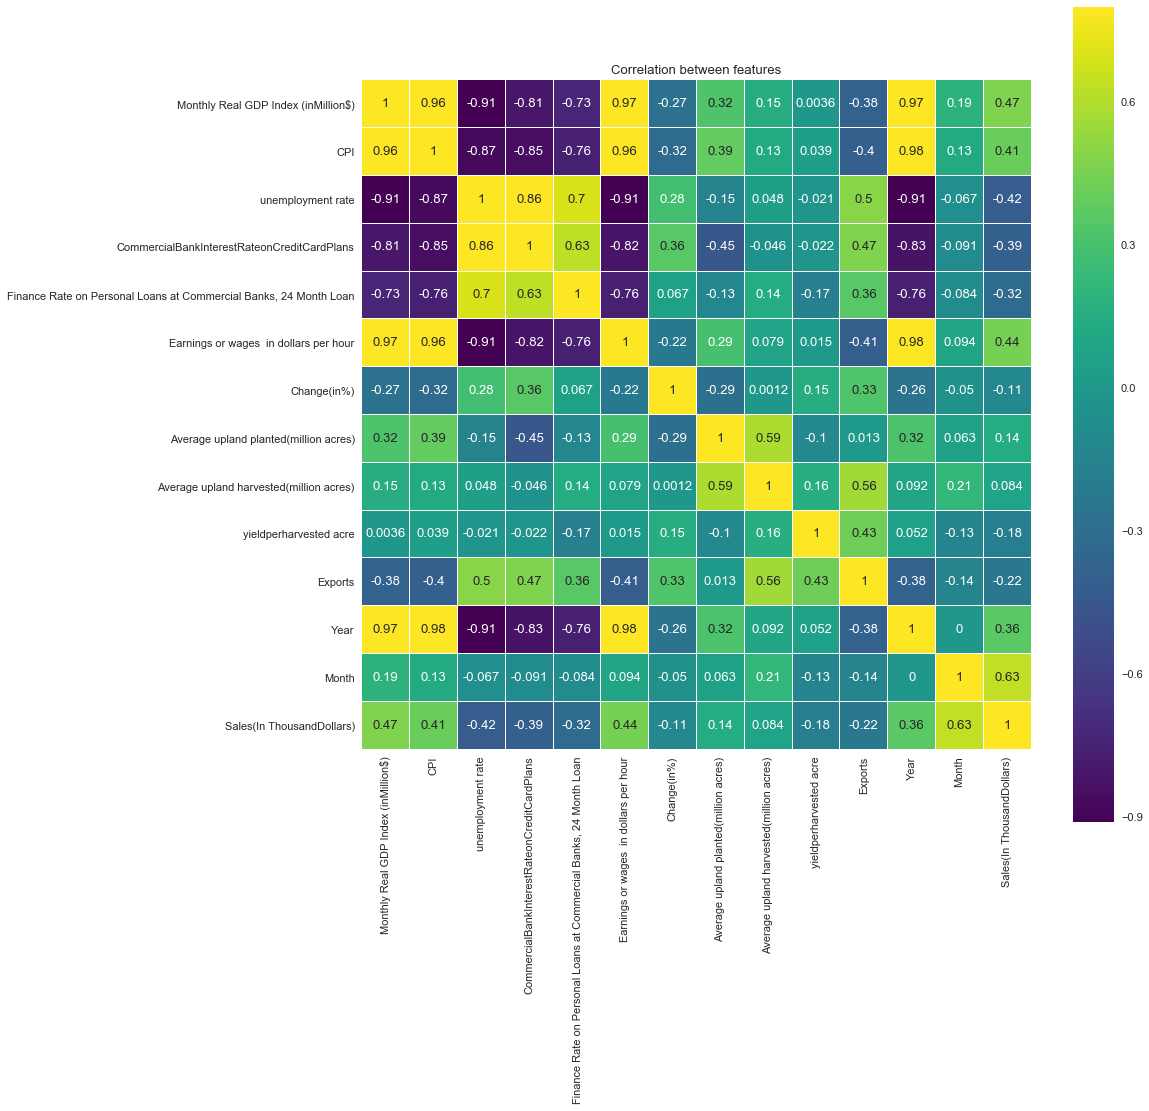

In [15]:
corrMatrix=macro_df_2[list(macro_df_2)].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

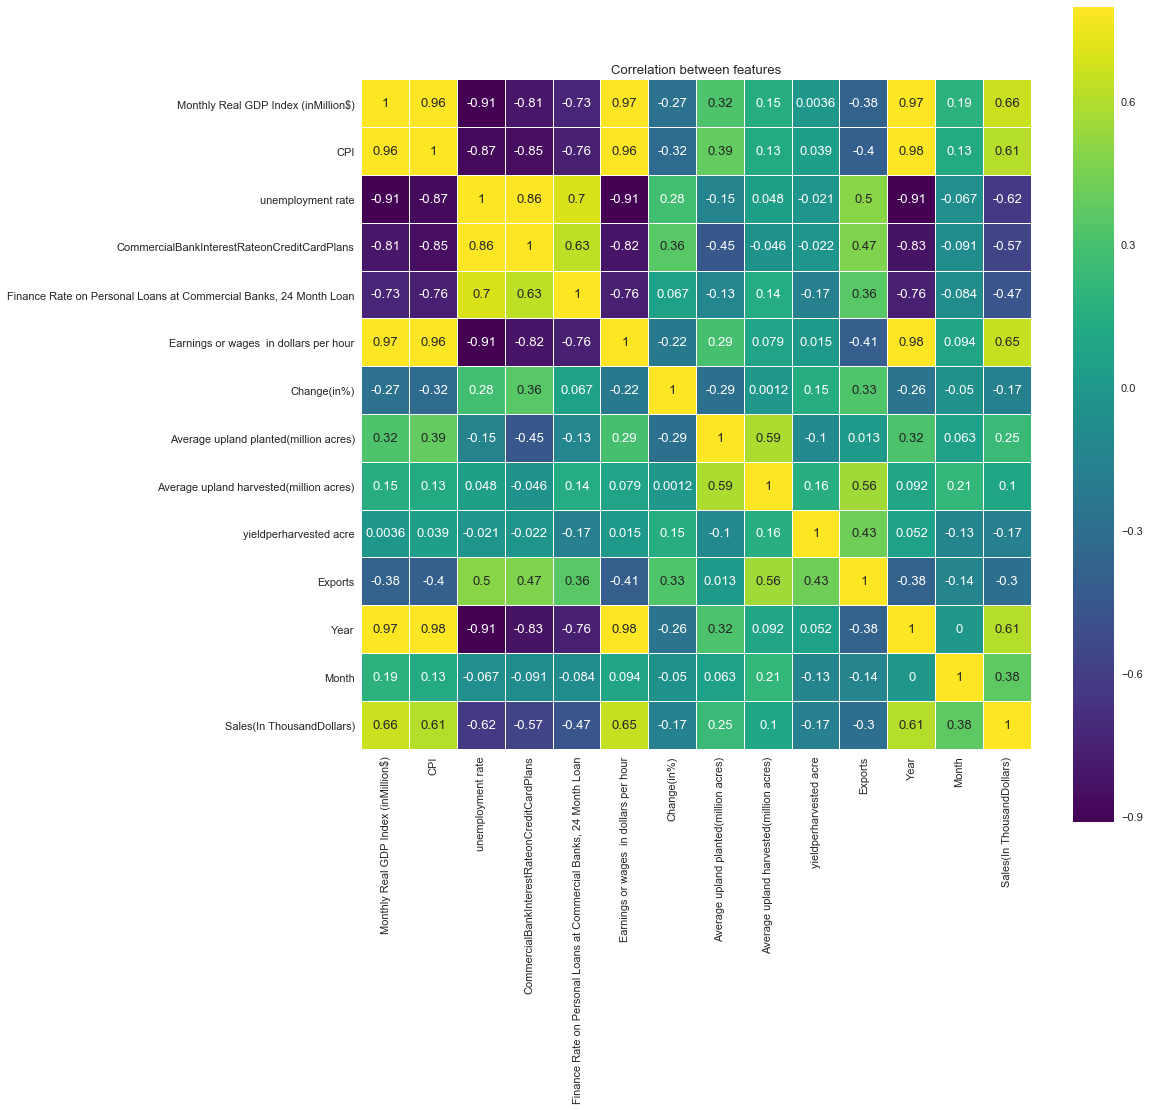

In [16]:
corrMatrix=macro_df_3[list(macro_df_3)].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

In [17]:
y_1=macro_df_1['Sales(In ThousandDollars)']
mean_1=y_1.mean()
std_1=y_1.std()
y_1=preprocessing.scale(y_1)
x_1=macro_df_1
#x_1= preprocessing.normalize(x_1)
x_1=preprocessing.scale(x_1)
x_1_lstm=[]
y_1_lstm=[]
for i in range(x_1.shape[0]-5):
    #print(i)
    x_1_lstm.append(x_1[i:i+5])
    y_1_lstm.append(y_1[i+5])
x_1_lstm=np.array(x_1_lstm)
y_1_lstm=np.array(y_1_lstm)


In [18]:

x_train, x_test, y_train, y_test = train_test_split(x_1_lstm,y_1_lstm,test_size=0.2)


lr_1=Sequential()
lr_1.add(LSTM(1,input_shape=(5, 14),return_sequences=True))
lr_1.add(LSTM(1,return_sequences=False))
#lr_1.add(Dense(y_train.shape[0]))
lr_1.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
z=lr_1.fit(x_train,y_train, nb_epoch=40, batch_size=1, verbose=2,validation_data=(x_test, y_test))



C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 53 samples, validate on 14 samples
Epoch 1/40
 - 1s - loss: 1.1235 - acc: 0.0000e+00 - val_loss: 0.6163 - val_acc: 0.0000e+00
Epoch 2/40
 - 0s - loss: 1.1002 - acc: 0.0000e+00 - val_loss: 0.5950 - val_acc: 0.0000e+00
Epoch 3/40
 - 0s - loss: 1.0817 - acc: 0.0000e+00 - val_loss: 0.5785 - val_acc: 0.0000e+00
Epoch 4/40
 - 0s - loss: 1.0669 - acc: 0.0000e+00 - val_loss: 0.5639 - val_acc: 0.0000e+00
Epoch 5/40
 - 0s - loss: 1.0540 - acc: 0.0000e+00 - val_loss: 0.5568 - val_acc: 0.0000e+00
Epoch 6/40
 - 0s - loss: 1.0446 - acc: 0.0000e+00 - val_loss: 0.5474 - val_acc: 0.0000e+00
Epoch 7/40
 - 0s - loss: 1.0373 - acc: 0.0000e+00 - val_loss: 0.5404 - val_acc: 0.0000e+00
Epoch 8/40
 - 0s - loss: 1.0313 - acc: 0.0000e+00 - val_loss: 0.5371 - val_acc: 0.0000e+00
Epoch 9/40
 - 0s - loss: 1.0273 - acc: 0.0000e+00 - val_loss: 0.5334 - val_acc: 0.0000e+00
Epoch 10/40
 - 0s - loss: 1.0242 - acc: 0.0000e+00 - val_loss: 0.5312 - val_acc: 0.0000e+00
Epoch 11/40
 - 0s - loss: 1.0214 - acc: 0.000

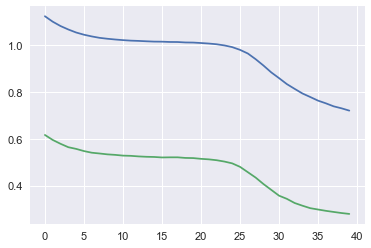

In [19]:
plt.plot(z.history['loss'],c='b')
plt.plot(z.history['val_loss'],c='g')
#plt.label('Loss')
plt.show()

In [20]:
result=(lr_1.predict(x_test))#*std_1)+mean_1
#np.array(x_1[66:66+5]).reshape(1,5,14)

<function matplotlib.pyplot.show(*args, **kw)>

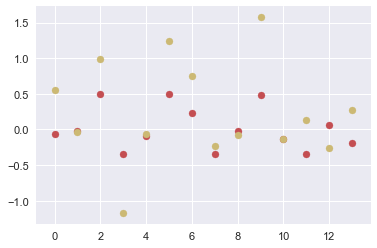

In [21]:
plt.scatter(range(y_test.shape[0]),result,c='r')
plt.scatter(range(y_test.shape[0]),y_test,c='y')
plt.show

In [22]:
x_1_lstm[1].shape

(5, 14)

In [23]:
y_2=macro_df_2['Sales(In ThousandDollars)']
mean_2=y_2.mean()
std_2=y_2.std()
y_2=preprocessing.scale(y_2)
x_2=macro_df_2
#x_1= preprocessing.normalize(x_1)
x_2=preprocessing.scale(x_2)
x_2_lstm=[]
y_2_lstm=[]
for i in range(x_2.shape[0]-5):
    #print(i)
    x_2_lstm.append(x_2[i:i+5])
    y_2_lstm.append(y_2[i+5])
x_2_lstm=np.array(x_2_lstm)
y_2_lstm=np.array(y_2_lstm)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_2_lstm,y_2_lstm,test_size=0.2)


lr_2=Sequential()
lr_2.add(LSTM(1,input_shape=(5, 14),return_sequences=True))
lr_2.add(LSTM(1,return_sequences=False))
#lr_2.add(Dense(1))
lr_2.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
z=lr_2.fit(x_train,y_train, nb_epoch=50, batch_size=1, verbose=2,validation_data=(x_test, y_test))



C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 53 samples, validate on 14 samples
Epoch 1/50
 - 1s - loss: 1.1331 - acc: 0.0000e+00 - val_loss: 0.4886 - val_acc: 0.0000e+00
Epoch 2/50
 - 0s - loss: 1.1231 - acc: 0.0000e+00 - val_loss: 0.4858 - val_acc: 0.0000e+00
Epoch 3/50
 - 0s - loss: 1.1133 - acc: 0.0000e+00 - val_loss: 0.4827 - val_acc: 0.0000e+00
Epoch 4/50
 - 0s - loss: 1.1039 - acc: 0.0000e+00 - val_loss: 0.4817 - val_acc: 0.0000e+00
Epoch 5/50
 - 0s - loss: 1.0938 - acc: 0.0000e+00 - val_loss: 0.4790 - val_acc: 0.0000e+00
Epoch 6/50
 - 0s - loss: 1.0844 - acc: 0.0000e+00 - val_loss: 0.4767 - val_acc: 0.0000e+00
Epoch 7/50
 - 0s - loss: 1.0745 - acc: 0.0000e+00 - val_loss: 0.4737 - val_acc: 0.0000e+00
Epoch 8/50
 - 0s - loss: 1.0657 - acc: 0.0000e+00 - val_loss: 0.4698 - val_acc: 0.0000e+00
Epoch 9/50
 - 0s - loss: 1.0561 - acc: 0.0000e+00 - val_loss: 0.4670 - val_acc: 0.0000e+00
Epoch 10/50
 - 0s - loss: 1.0485 - acc: 0.0000e+00 - val_loss: 0.4619 - val_acc: 0.0000e+00
Epoch 11/50
 - 0s - loss: 1.0407 - acc: 0.000

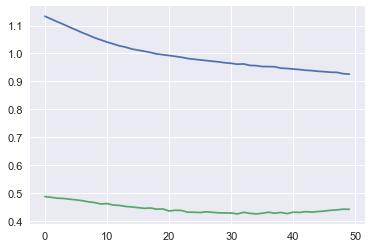

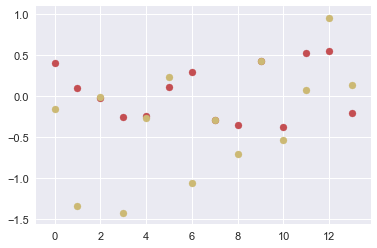

In [25]:
plt.plot(z.history['loss'])
plt.plot(z.history['val_loss'])
plt.show()
result=(lr_2.predict(x_test))
plt.scatter(range(y_test.shape[0]),result,c='r')
plt.scatter(range(y_test.shape[0]),y_test,c='y')
plt.show()

In [26]:
y_3=macro_df_3['Sales(In ThousandDollars)']
mean_3=y_3.mean()
std_3=y_3.std()
y_3=preprocessing.scale(y_1)
x_3=macro_df_3
#x_1= preprocessing.normalize(x_1)
x_3=preprocessing.scale(x_3)
x_3_lstm=[]
y_3_lstm=[]
for i in range(x_3.shape[0]-5):
    #print(i)
    x_3_lstm.append(x_3[i:i+5])
    y_3_lstm.append(y_3[i+5])
x_3_lstm=np.array(x_3_lstm)
y_3_lstm=np.array(y_3_lstm)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_3_lstm,y_3_lstm,test_size=0.2)


lr_3=Sequential()
lr_3.add(LSTM(1,input_shape=(5, 14),return_sequences=True))
lr_3.add(LSTM(1,return_sequences=False))
#lr_1.add(Dense(y_train.shape[0]))
lr_3.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
z=lr_3.fit(x_train,y_train, nb_epoch=40, batch_size=1, verbose=2,validation_data=(x_test, y_test))



C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 53 samples, validate on 14 samples
Epoch 1/40
 - 1s - loss: 0.8594 - acc: 0.0000e+00 - val_loss: 1.5561 - val_acc: 0.0000e+00
Epoch 2/40
 - 0s - loss: 0.8216 - acc: 0.0000e+00 - val_loss: 1.5262 - val_acc: 0.0000e+00
Epoch 3/40
 - 0s - loss: 0.7976 - acc: 0.0000e+00 - val_loss: 1.5040 - val_acc: 0.0000e+00
Epoch 4/40
 - 0s - loss: 0.7769 - acc: 0.0000e+00 - val_loss: 1.4915 - val_acc: 0.0000e+00
Epoch 5/40
 - 0s - loss: 0.7361 - acc: 0.0000e+00 - val_loss: 1.4713 - val_acc: 0.0000e+00
Epoch 6/40
 - 0s - loss: 0.6960 - acc: 0.0000e+00 - val_loss: 1.4511 - val_acc: 0.0000e+00
Epoch 7/40
 - 0s - loss: 0.6689 - acc: 0.0000e+00 - val_loss: 1.4318 - val_acc: 0.0000e+00
Epoch 8/40
 - 0s - loss: 0.6384 - acc: 0.0000e+00 - val_loss: 1.4101 - val_acc: 0.0000e+00
Epoch 9/40
 - 0s - loss: 0.6114 - acc: 0.0000e+00 - val_loss: 1.3911 - val_acc: 0.0000e+00
Epoch 10/40
 - 0s - loss: 0.5974 - acc: 0.0000e+00 - val_loss: 1.3753 - val_acc: 0.0000e+00
Epoch 11/40
 - 0s - loss: 0.5879 - acc: 0.000

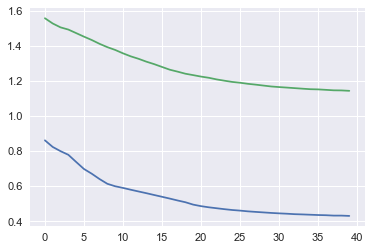

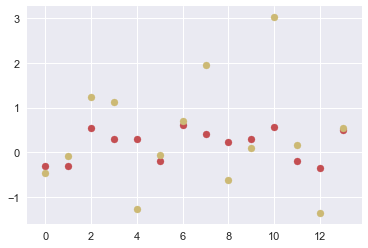

In [28]:
plt.plot(z.history['loss'])
plt.plot(z.history['val_loss'])
plt.show()
result=(lr_2.predict(x_test))
plt.scatter(range(y_test.shape[0]),result,c='r')
plt.scatter(range(y_test.shape[0]),y_test,c='y')
plt.show()

In [29]:
testdata=pd.read_csv('Test_Kaggle.csv')

testdata.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,WomenClothing,NaN
1,2015,1,MenClothing,NaN
2,2015,1,OtherClothing,NaN
3,2015,2,WomenClothing,NaN
4,2015,2,MenClothing,NaN


In [30]:
macro_rest=macro_rest.reset_index(drop=True)[:12]


In [31]:
macro_rest=macro_rest.drop(['Year-Month'],axis=1)

In [32]:
macro_rest['Month']=[1,2,3,4,5,6,7,8,9,10,11,12]
macro_rest['Year']=2015

macro_rest

,Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Exports,Year,Month,Sales(In ThousandDollars)
0,16319.786314,258.376,5.7,11.99,10.47,24.88,-1.39,10.845,9.518,760,9.450,2015,1,NaN
1,16400.926737,259.240,5.5,11.98,9.85,25.05,3.70,10.845,9.518,781,10.200,2015,2,NaN
2,16329.523792,259.647,5.4,11.98,9.85,25.04,-0.70,10.845,9.518,781,10.250,2015,3,NaN
3,16427.136671,259.959,5.4,11.98,9.85,24.94,3.39,10.845,9.518,794,10.250,2015,4,NaN
4,16434.482376,261.066,5.5,12.04,9.69,24.88,1.62,10.845,9.157,826,10.300,2015,5,NaN
5,16521.301886,261.512,5.3,12.04,9.69,24.77,-0.70,9.399,8.451,797,10.150,2015,6,NaN
6,16475.999854,261.199,5.2,12.04,9.69,24.83,0.00,8.850,8.353,807,10.250,2015,7,NaN
7,16505.537615,261.347,5.1,12.10,9.80,25.04,-0.73,8.750,7.749,784,9.475,2015,8,NaN
8,16601.489879,261.887,5.0,12.10,9.80,25.05,-4.29,8.398,8.012,777,9.700,2015,9,NaN
9,16540.859723,261.515,5.0,12.10,9.80,25.14,0.42,8.398,8.012,772,9.700,2015,10,NaN


In [33]:
#macro_rest=preprocessing.scale(macro_rest)

In [34]:
macro_rest['Sales(In ThousandDollars)']=macro_rest['Sales(In ThousandDollars)'].fillna(0)
#macro_rest=preprocessing.scale(macro_rest)
#macro_df_1[67:67+5]=preprocessing.scale(macro_df_1[67:67+5])
macro_rest_1_lstm=pd.concat([macro_df_1[67:67+5],macro_rest])
macro_rest_2_lstm=pd.concat([macro_df_2[67:67+5],macro_rest])
macro_rest_3_lstm=pd.concat([macro_df_3[67:67+5],macro_rest])

In [35]:
macro_rest_1_lstm=macro_rest_1_lstm.reset_index(drop=True)
macro_rest_2_lstm=macro_rest_2_lstm.reset_index(drop=True)
macro_rest_3_lstm=macro_rest_3_lstm.reset_index(drop=True)

In [36]:
lr_1.predict(preprocessing.scale(macro_rest_1_lstm[0:5]).reshape(1,5,14))

array([[-0.23163998]], dtype=float32)

In [37]:
pred1=[]
pred2=[]
pred3=[]
for i in range(macro_rest_1_lstm.shape[0]-4):
    p=lr_1.predict(preprocessing.scale(macro_rest_1_lstm[i:i+5]).reshape(1,5,14))
    pred1.append((p*std_1)+mean_1)
    macro_rest_1_lstm['Sales(In ThousandDollars)'][i+5]=pred1[i]
    q=lr_2.predict(preprocessing.scale(macro_rest_2_lstm[i:i+5]).reshape(1,5,14))
    pred2.append((p*std_2)+mean_2)
    macro_rest_2_lstm['Sales(In ThousandDollars)'][i+5]=pred2[i]
    r=lr_3.predict(preprocessing.scale(macro_rest_3_lstm[i:i+5]).reshape(1,5,14))
    pred3.append((p*std_3)+mean_3)
    macro_rest_3_lstm['Sales(In ThousandDollars)'][i+5]=pred3[i]

C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Harsha\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-




pred_1=(lr_1.predict(macro_rest)*std_1)+mean_1
pred_2=(lr_2.predict(macro_rest)*std_2)+mean_2
pred_3=(lr_3.predict(macro_rest)*std_3)+mean_3



In [38]:
pred_f=[]
for j in range(12):
    pred_f.append(pred1[j])
    pred_f.append(pred2[j]) 
    pred_f.append(pred3[j]) 

In [39]:
fil=open('subv_svr_macrolstm2.csv','w')
fil.write('Year,Sales(In ThousandDollars)\n')
for i in range(len(pred_f)-1):
    fil.write('%d,%d\n'%(i+1,pred_f[i]))
    #print('%d,%d\n'%(i+1,pred_f[i]))
fil.write('%d,%d'%(i+2,pred_f[i+1]))
fil.close()

In [41]:
macro_rest_1_lstm.to_csv('macro_rest_1_lstm.csv')

In [44]:
macro_df_1.to_csv('macro_df_1.csv')
macro_df_2.to_csv('macro_df_2.csv')
macro_df_3.to_csv('macro_df_3.csv')